In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('E:\Deep - Data Science\Online Lectures\Machine Learning\Resources\shopping_data.csv')

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
finaldata=data.iloc[:,3:5]
finaldata.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


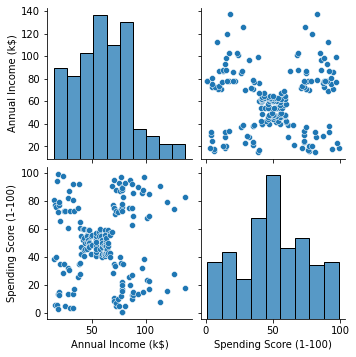

In [7]:
sns.pairplot(finaldata)

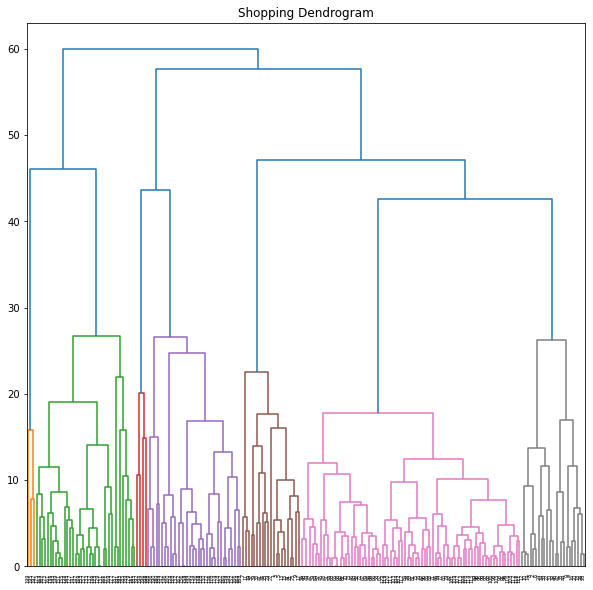

In [9]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,10))
plt.title('Shopping Dendrogram')
dend = shc.dendrogram(shc.linkage(finaldata,method='average'))
plt.show()

## Build an Unsupervised Model

In [17]:
from sklearn.cluster import AgglomerativeClustering
aggmodel = AgglomerativeClustering(n_clusters=7,linkage='average')
aggmodel.fit(finaldata)

AgglomerativeClustering(linkage='average', n_clusters=7)

In [18]:
print('The labels of the datasets are')
print('------------------------------')
print(aggmodel.labels_)

The labels of the datasets are
------------------------------
[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 6 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 5 0 5 4 5 4 5 4]


In [19]:
finaldata['Cluster_labels'] = aggmodel.labels_
finaldata.head()

,Annual Income (k$),Spending Score (1-100),Cluster_labels
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


Text(0, 0.5, 'Spending Score')

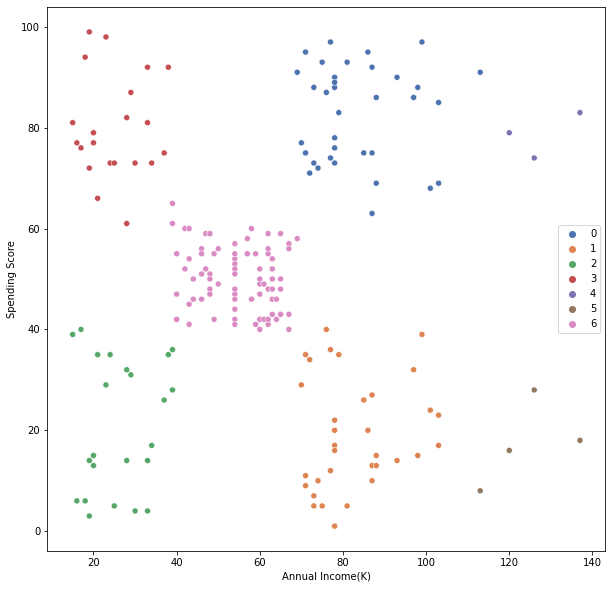

In [20]:
plt.figure(figsize=(10,10))
#plt.scatter(finaldata.iloc[:,0],finaldata.iloc[:,1],c=aggmodel.labels_,cmap='rainbow')
sns.scatterplot(x=finaldata.iloc[:,0],y=finaldata.iloc[:,1],hue=aggmodel.labels_,palette = 'deep')
plt.xlabel('Annual Income(K)')
plt.ylabel('Spending Score')

In [23]:
finaldata['Cluster_labels'].value_counts()

6    79
0    36
1    34
2    23
3    21
5     4
4     3
Name: Cluster_labels, dtype: int64